In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
K_real_img = np.load('real_K_726327.npy')
ch1_real_img = np.load('real_ch1_726327.npy')
ch4_real_img = np.load('real_ch4_726327.npy')
ch1_fake_img = np.load('fake_L_726327.npy')
ch4_fake_img = np.load('fake_ch4_726327.npy')

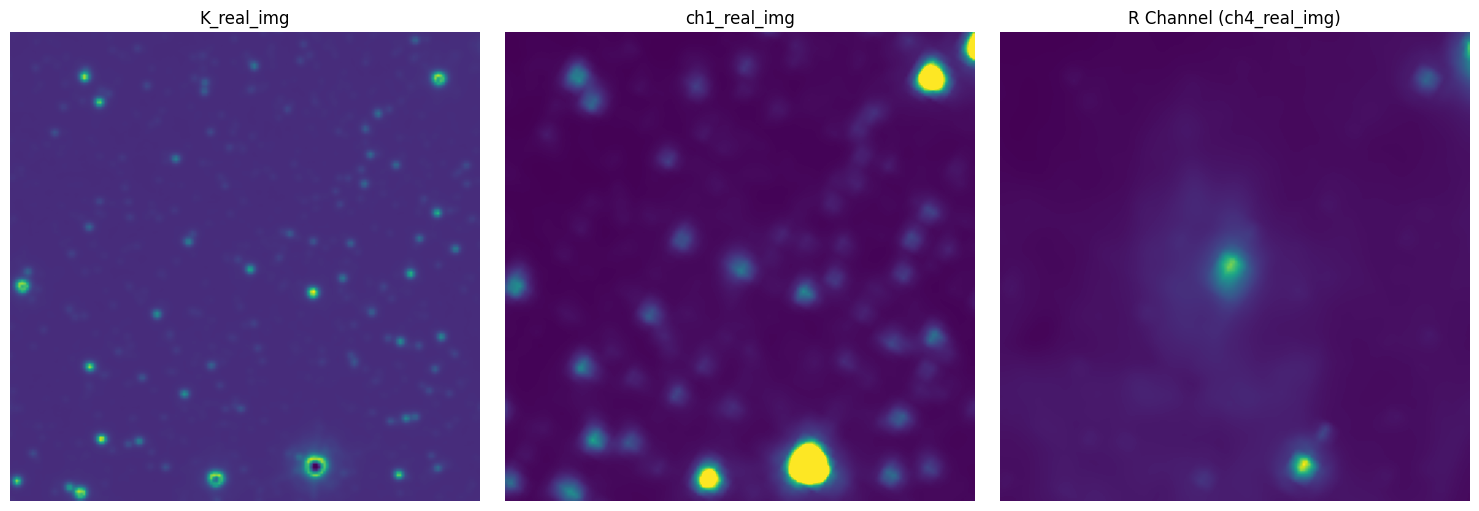

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(K_real_img, cmap='viridis')  # Blue 채널
axes[0].set_title('B Channel (K_real_img)')
axes[0].axis('off')

axes[1].imshow(ch1_real_img, cmap='viridis', vmax=0.3)  # Green 채널
axes[1].set_title('G Channel (ch1_real_img)')
axes[1].axis('off')

axes[2].imshow(ch4_real_img, cmap='viridis')  # Red 채널
axes[2].set_title('R Channel (ch4_real_img)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

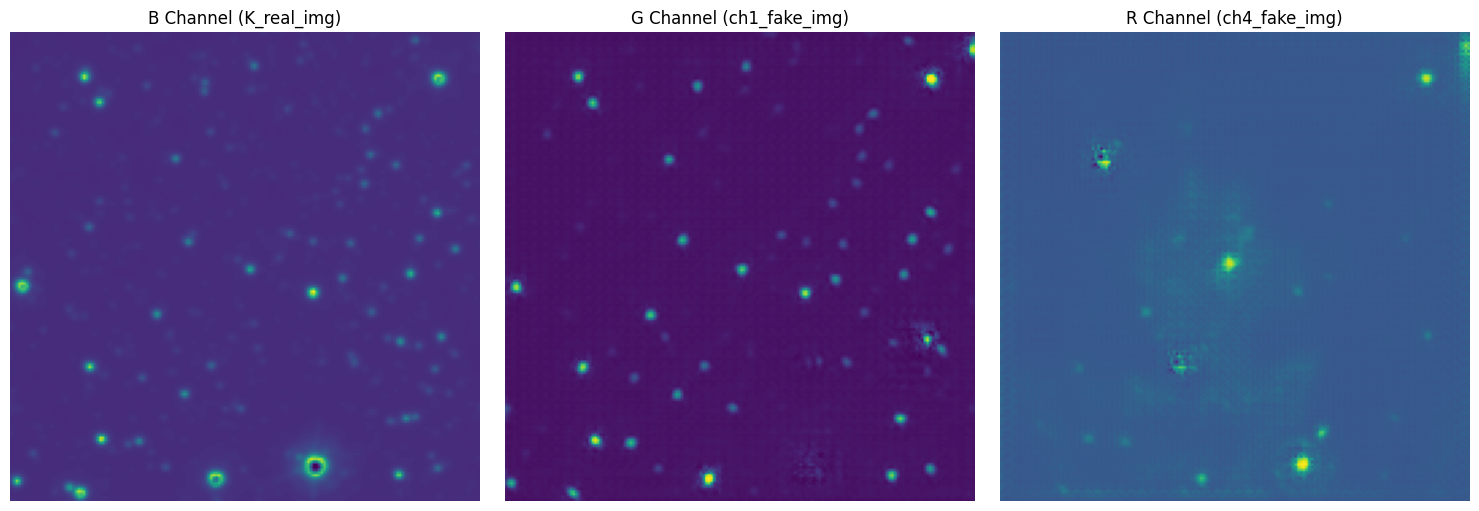

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(K_real_img, cmap='viridis')  # Blue 채널
axes[0].set_title('B Channel (K_real_img)')
axes[0].axis('off')

axes[1].imshow(ch1_fake_img, cmap='viridis')  # Green 채널
axes[1].set_title('G Channel (ch1_fake_img)')
axes[1].axis('off')

axes[2].imshow(ch4_fake_img, cmap='viridis')  # Red 채널
axes[2].set_title('R Channel (ch4_fake_img)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [16]:
print(np.max(ch1_real_img))
print(np.max(ch1_fake_img))

1.0
0.9994187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


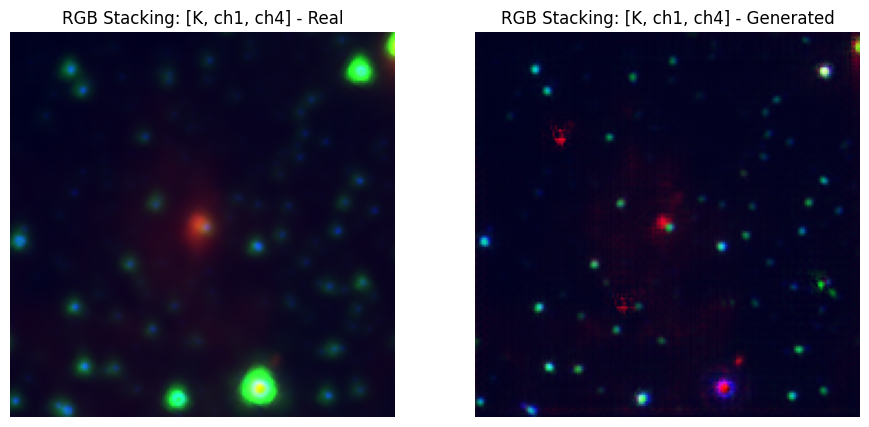

In [7]:
gen_rgb_image = np.stack((ch4_fake_img, ch1_fake_img, K_real_img), axis=-1)  # (H, W, C)
real_rgb_image = np.stack((ch4_real_img, ch1_real_img*3.3, K_real_img), axis=-1)  # (H, W, C)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].imshow(real_rgb_image)
axes[0].axis('off')
axes[0].set_title('RGB Stacking: [K, ch1, ch4] - Real')

axes[1].imshow(gen_rgb_image)
axes[1].axis('off')
axes[1].set_title('RGB Stacking: [K, ch1, ch4] - Generated')
plt.show()

In [11]:
# 채널별 정규화 함수
def normalize_channel(channel):
    channel = (channel - channel.min()) / (channel.max() - channel.min())  # [0, 1]로 스케일링
    channel = (channel * 255).astype(np.uint8)  # [0, 255]로 변환
    return channel

K_real_img_norm = normalize_channel(K_real_img)
ch1_real_img_norm = normalize_channel(ch1_real_img)
ch4_real_img_norm = normalize_channel(ch4_real_img)
ch1_fake_img_norm = normalize_channel(ch1_fake_img)
ch4_fake_img_norm = normalize_channel(ch4_fake_img)

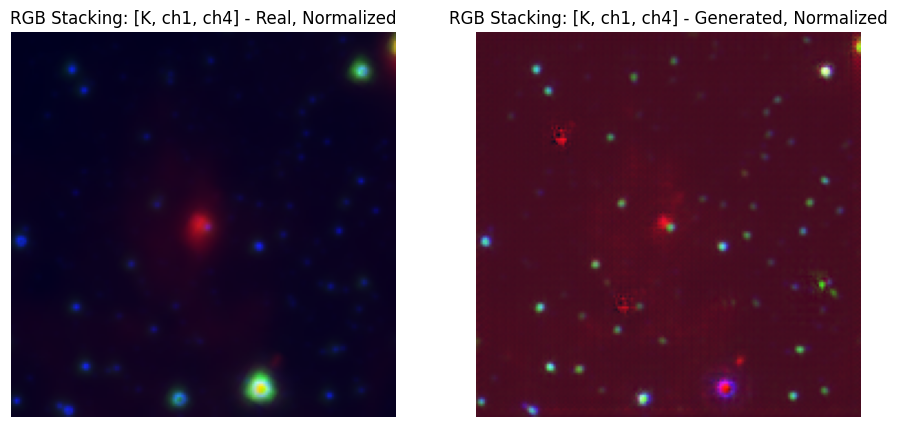

In [13]:
gen_rgb_image =  np.stack((ch4_fake_img_norm, ch1_fake_img_norm, K_real_img_norm), axis=-1)  # (H, W, 3)
real_rgb_image = np.stack((ch4_real_img_norm, ch1_real_img_norm, K_real_img_norm), axis=-1)  # (H, W, C)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].imshow(real_rgb_image)
axes[0].axis('off')
axes[0].set_title('RGB Stacking: [K, ch1, ch4] - Real, Normalized')

axes[1].imshow(gen_rgb_image)
axes[1].axis('off')
axes[1].set_title('RGB Stacking: [K, ch1, ch4] - Generated, Normalized')
plt.show()

In [ ]:
K_real_img = np.load('real_K_726327.npy')
ch1_fake_img = np.load('fake_L_726327.npy')
ch4_fake_img = np.load('fake_ch4_726327.npy')